<a href="https://colab.research.google.com/github/crazygovind/AI-Foundation-Whitehat-Jr/blob/master/60_Project_Multiple_linear_regression_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Multiple linear regression - Introduction
 2. Car Prediction - Feature Encoding
 
 
 

---

### Problem Statement

Implement multiple linear regression to create a predictive model capable of predicting the price of diamonds on the basis of various factors such as its cut, color, clarity, depth etc. 

---

### List of Activities
 
**Activity 1:** Analysing the Dataset

**Activity 2:** Data Preparation

**Activity 3:** Feature Encoding

**Activity 4:** Train-Test Split
 
**Activity 5:** Model Training using `statsmodels.api`



 


---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **Diamonds** dataset using the below link. This dataset consists of following columns:

|Field|Description|
|---:|:---|
|carat|weight of the diamond|
|cut|quality of the cut|
|color|diamond colour, from J (worst) to D (best)|
|clarity|a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|depth|total depth percentage = z / mean(x, y) = 2 * z / (x + y)|
|table|The width of the diamond's table expressed as a percentage of its average diameter|
|price|price in US dollars|
|x|length in mm|
|y|width in mm|
|z|depth in mm|


  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.

- Remove the unnecessary column `Unnamed: 0` as it is of no use.



In [ ]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df=pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/diamonds.csv')

# Print first five rows using head() function
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
# Print the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# Drop 'Unnamed: 0' column
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


---

#### Activity 2: Data Preparation

Extract numerical attributes from the dataset and create a heatmap to identify correlation among various numerical attributes.

In [ ]:
# Extract all the numeric (float and int type) columns from the dataset.
numeric_df=df.select_dtypes(include=['float64','int64'])
numeric_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


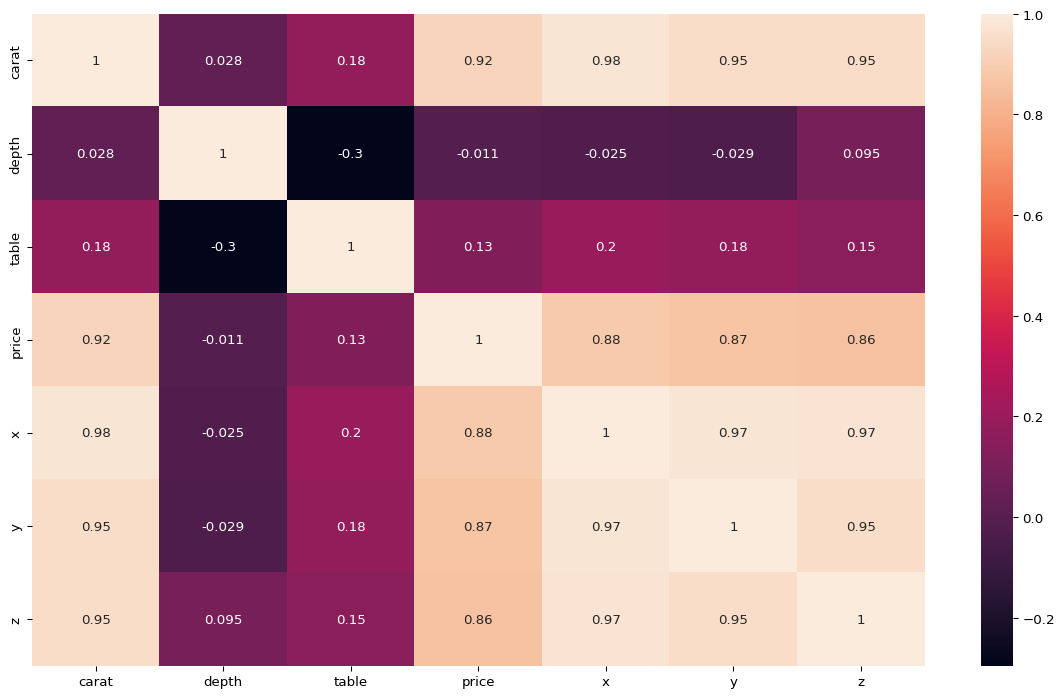

In [ ]:
# Draw a correlation heatmap between the numeric features.
plt.figure(figsize=(10,5),dpi=96)
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

**Q:** Which features are highly correlated with `price`?

**A:** 

**Q:** Is there multicollinearity in the dataset?

**A:** 



---

#### Activity 3: Feature Encoding

The dataset contains certain columns that are categorical. However for linear regression, we need all numerical variables. Perform **one-hot encoding** to obtain numeric values from non-numeric categorical values. 


In [ ]:
# Create a new dataframe having dummy variables for all the categorical type columns of the dataset using 'get_dummies()' function.
df_dummies=pd.get_dummies(df,dtype=int)
df_dummies

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Print the information of the new dataframe obtained after one-hot encoding
df=df_dummies
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Fair       53940 non-null  int64  
 8   cut_Good       53940 non-null  int64  
 9   cut_Ideal      53940 non-null  int64  
 10  cut_Premium    53940 non-null  int64  
 11  cut_Very Good  53940 non-null  int64  
 12  color_D        53940 non-null  int64  
 13  color_E        53940 non-null  int64  
 14  color_F        53940 non-null  int64  
 15  color_G        53940 non-null  int64  
 16  color_H        53940 non-null  int64  
 17  color_I        53940 non-null  int64  
 18  color_

----

#### Activity 4: Train-Test Split

We need to predict the value of `price` variable, using other variables. Thus, `price` is the target or dependent variable and other columns except `price` are the features or the independent variables.

Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set and keep the `price` as the target variables.

In [ ]:
# Split the 'df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.33,random_state=42)
features=list(df.columns)
features.remove('price')
x_train=train_df[features]
x_test=test_df[features]
y_train=train_df['price']
y_test=test_df['price']
x_train.shape

(36139, 26)

In [ ]:
# Create separate data-frames for the feature and target variables for both the train and test sets.
x_train.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
241,1.01,64.5,58.0,6.29,6.21,4.03,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
17398,0.32,61.4,57.0,4.41,4.38,2.70,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
36608,0.34,62.5,59.0,4.43,4.46,2.78,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
44731,0.56,61.8,55.0,5.30,5.34,3.29,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
18104,1.02,61.0,57.0,6.48,6.50,3.96,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


---

#### Activity 5: Model Training using `statsmodels.api`

Now build a multiple linear regression model using the `statsmodels.api` module.
Also, print the summary of the linear regression model built.

In [ ]:
#  Build a linear regression model using all the features to predict insurance charges.
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
lr.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const             3939.481096
carat            11246.354571
depth              -63.931886
table              -27.110400
x                 -985.632729
y                   -6.142607
z                  -54.410726
cut_Fair           203.288049
cut_Good           790.795938
cut_Ideal         1039.946286
cut_Premium        969.572698
cut_Very Good      935.878125
color_D           1396.954458
color_E           1177.459900
color_F           1125.549024
color_G            894.580249
color_H            393.796486
color_I            -75.555711
color_J           -973.303311
clarity_I1       -3392.185432
clarity_IF        2065.300863
clarity_SI1        350.950364
clarity_SI2       -614.946001
clarity_VS1       1255.511058
clarity_VS2        939.254403
clarity_VVS1      1703.723605
clarity_VVS2      1631.872236
dtype: float64

In [ ]:
# Print the summary of the linear regression report.
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.796e+04
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        07:41:32   Log-Likelihood:            -3.0554e+05
No. Observations:               36139   AIC:                         6.111e+05
Df Residuals:                   36115   BIC:                         6.113e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3939.4811    328.598     11.989